In [1]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np



## 피벗이란?

   피벗은 단어의 의미 그대로 회전중심축을 의미하는데, 원본 데이터를 사용자가 정의한 축을 중심으로 다양하게 분석(회전)해볼 수 있다는 의미입니다

## 데이터프레임 만들기

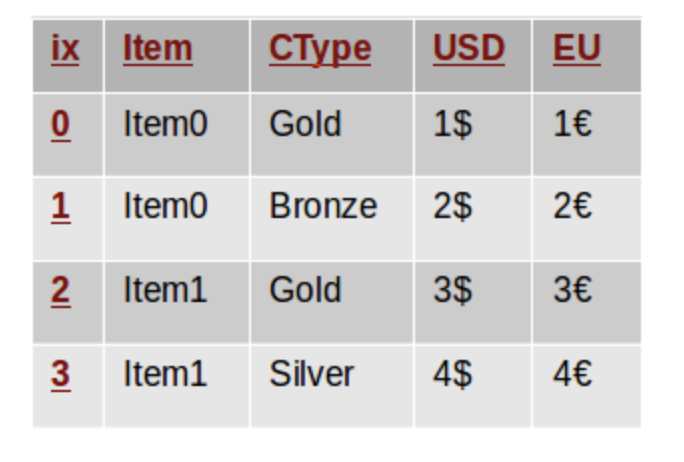

In [5]:
from IPython.display import Image
Image(filename='pivot_dataframe.png') 

In [2]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))

In [3]:
d = DataFrame(table)

In [4]:
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


## 칼럼과 인덱스 그리고 값을 지정해서 새로운 데이터 프레임으로 변형

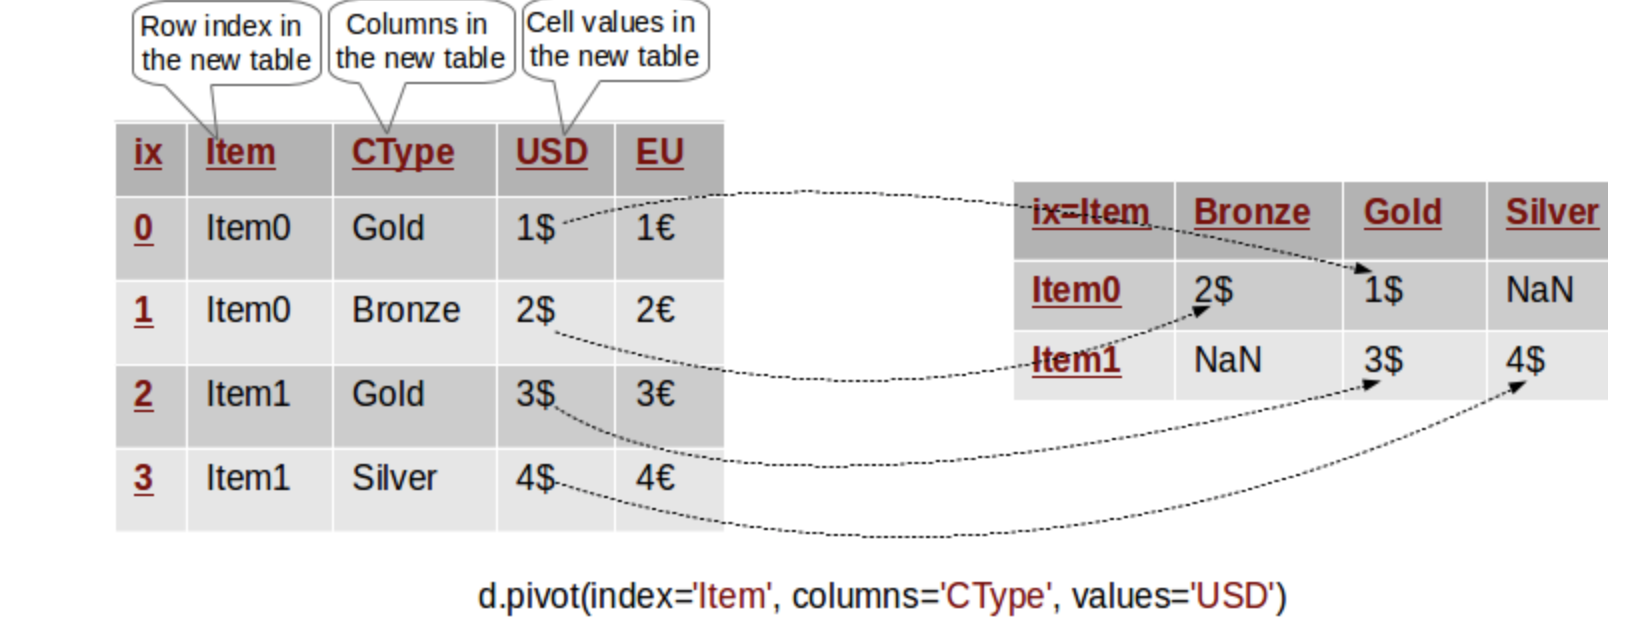

In [11]:
from IPython.display import Image
Image(filename='pivot_process.png') 

### pivot 메소드는 인덱스, 칼럼, 값에 대한 정보만 처리

In [67]:
help(d.pivot)

Help on method pivot in module pandas.core.frame:

pivot(index=None, columns=None, values=None) method of pandas.core.frame.DataFrame instance
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from index / columns to form axes of the resulting
    DataFrame.
    
    Parameters
    ----------
    index : string or object, optional
        Column name to use to make new frame's index. If None, uses
        existing index.
    columns : string or object
        Column name to use to make new frame's columns
    values : string or object, optional
        Column name to use for populating new frame's values. If not
        specified, all remaining columns will be used and the result will
        have hierarchically indexed columns
    
    Returns
    -------
    pivoted : DataFrame
    
    See also
    --------
    DataFrame.pivot_table : generalization of pivot that can handle
        duplicate values for one index/column pair
    DataFrame.unsta

In [68]:
d

,Item,CType,USD,EU
0,Item0,Gold,1,1.1
1,Item0,Bronze,2,2.2
2,Item0,Gold,3,3.3
3,Item1,Silver,4,4.4


In [21]:
d.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
d.CType

0      Gold
1    Bronze
2      Gold
3    Silver
Name: CType, dtype: object

In [17]:
d.USD

0    1$
1    2$
2    3$
3    4$
Name: USD, dtype: object

In [18]:
d.Item

0    Item0
1    Item0
2    Item1
3    Item1
Name: Item, dtype: object

In [12]:
# Original DataFrame: Access the USD cost of Item0 for Gold customers
print (d[(d.Item=='Item0') & (d.CType=='Gold')].USD.values)


['1$']


In [30]:
d[['Item','USD']].loc[1][1]

'2$'

### 기존에 있는 열을 인덱스와 칼럼을 열에서 값도 지정해서  정의

In [6]:
p = d.pivot(index='Item', columns='CType', values='USD')

In [9]:
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,None
Item1,None,3$,4$


In [69]:
p.index

Index(['Item0', 'Item1'], dtype='object', name='Item')

In [70]:
p.columns

Index(['Bronze', 'Gold', 'Silver'], dtype='object', name='CType')

In [71]:
p.values

array([[  2.,   2.,  nan],
       [ nan,  nan,   4.]])

### 피봇으로 재배치된 열의 정보를 확인하기

In [14]:
p.Gold

Item
Item0    1$
Item1    3$
Name: Gold, dtype: object

In [15]:
p.Gold.values

array(['1$', '3$'], dtype=object)

In [13]:
# Pivoted DataFrame: Access the USD cost of Item0 for Gold customers
print (p[p.index=='Item0'].Gold.values)

['1$']


## pivot으로 칼럼을 멀티인덱스 처리하기 

### values 키워드를 주지 않으면 열의 칼럼명이 상위 칼럼의 인덱스로 올라간다

In [32]:
p1 = d.pivot(index='Item', columns='CType')

In [33]:
p1

USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$   None     2€   1€   None
Item1   None   3$     4$   None   3€     4€

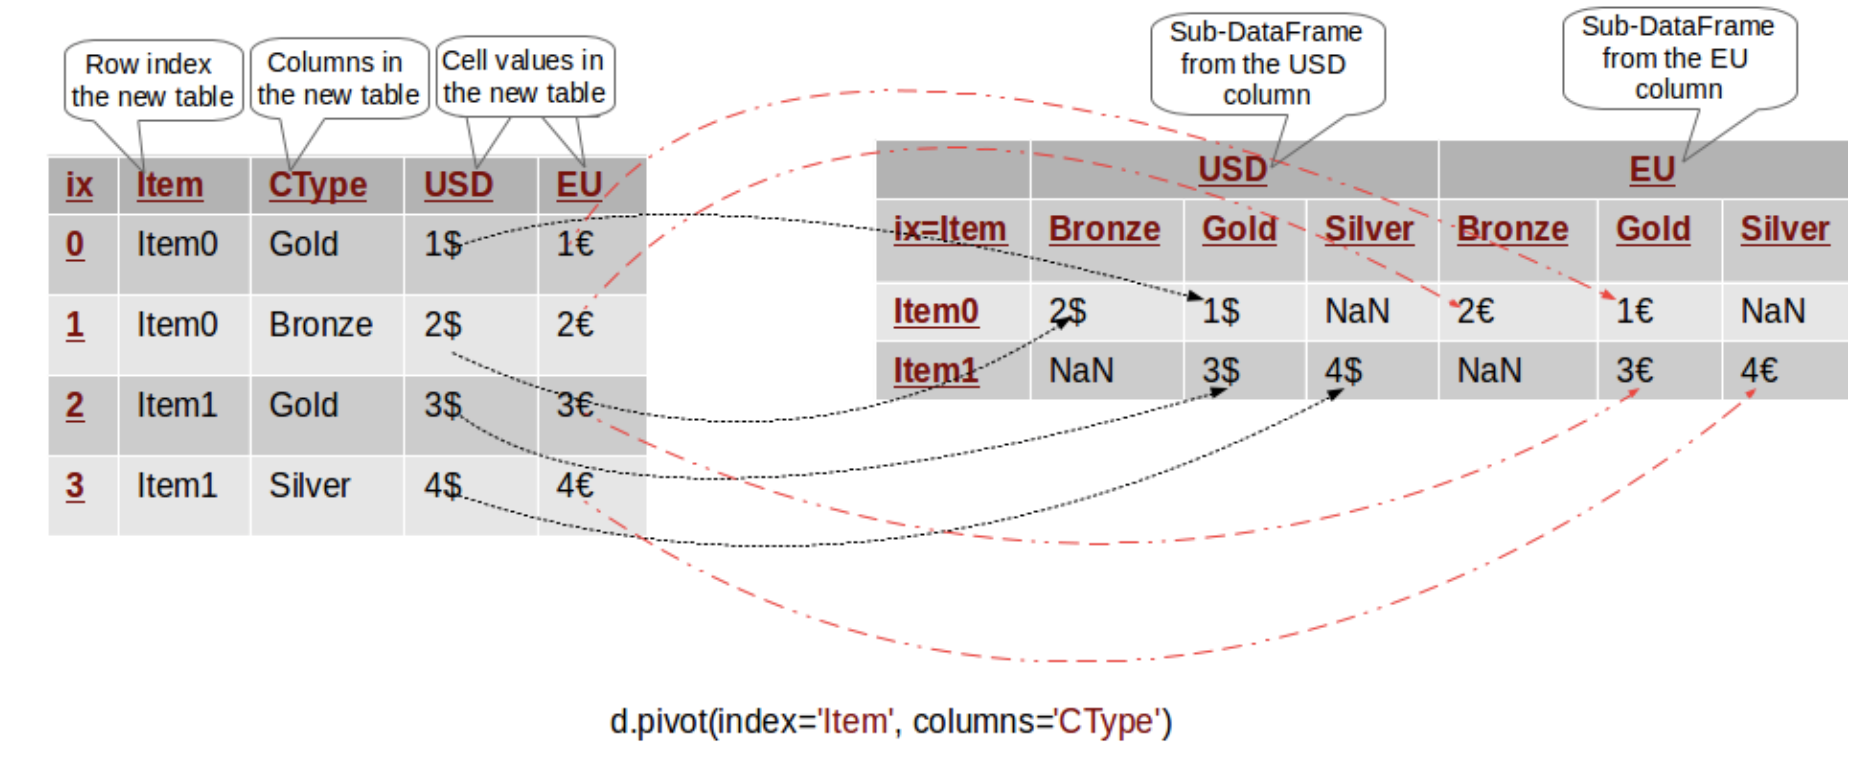

In [34]:
from IPython.display import Image
Image(filename='pivot_multiindex.png') 

## 동일한 값이 있을 경우 pivot 메소드로 처리시 예외가 발생

## 키가 동일할 경우 값이 두개 있으면 예외처리를 한다.

In [35]:


table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1',  '2',  '3',  '4']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = pd.DataFrame(table)

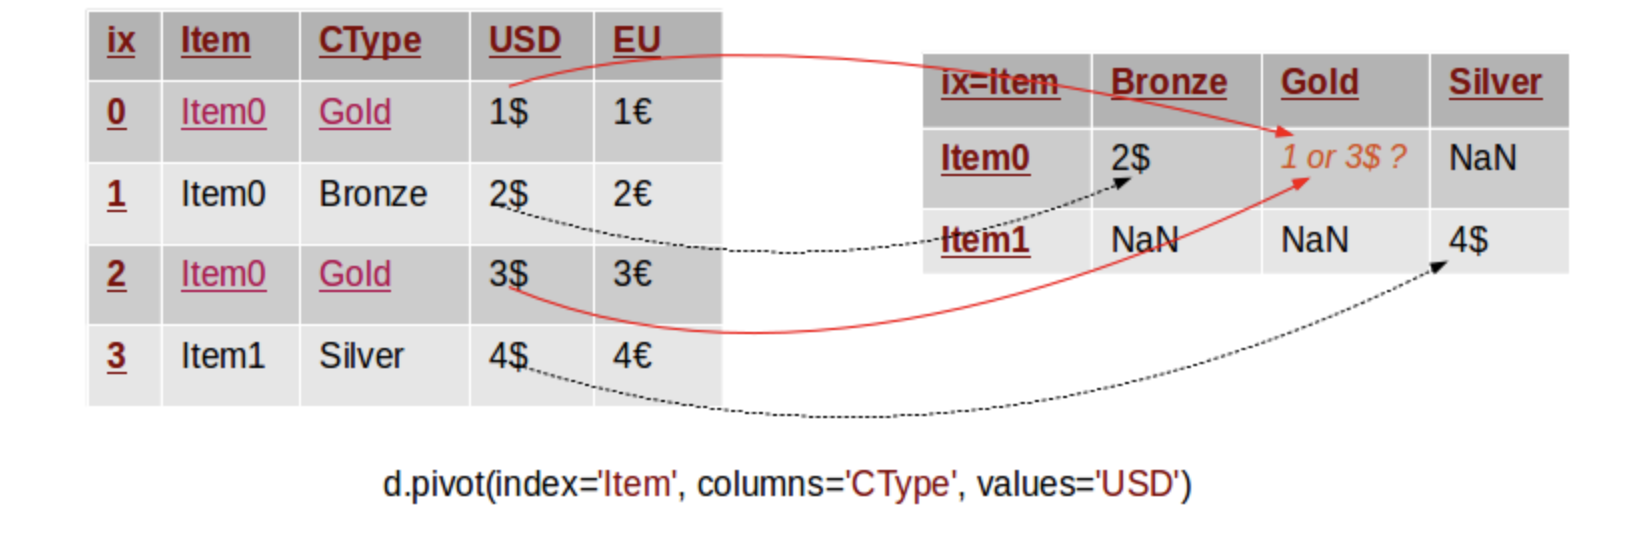

In [36]:
from IPython.display import Image
Image(filename='pivot_error.png') 

In [39]:
d

,Item,CType,USD,EU
0,Item0,Gold,1,1€
1,Item0,Bronze,2,2€
2,Item0,Gold,3,3€
3,Item1,Silver,4,4€


In [37]:
p = d.pivot(index='Item', columns='CType', values='USD')

ValueError: Index contains duplicate entries, cannot reshape

In [40]:
p = d.pivot(index='Item', columns='CType')

ValueError: Index contains duplicate entries, cannot reshape

## 값이 중복될 경우는 pivot_table로 aggfunc으로  처리

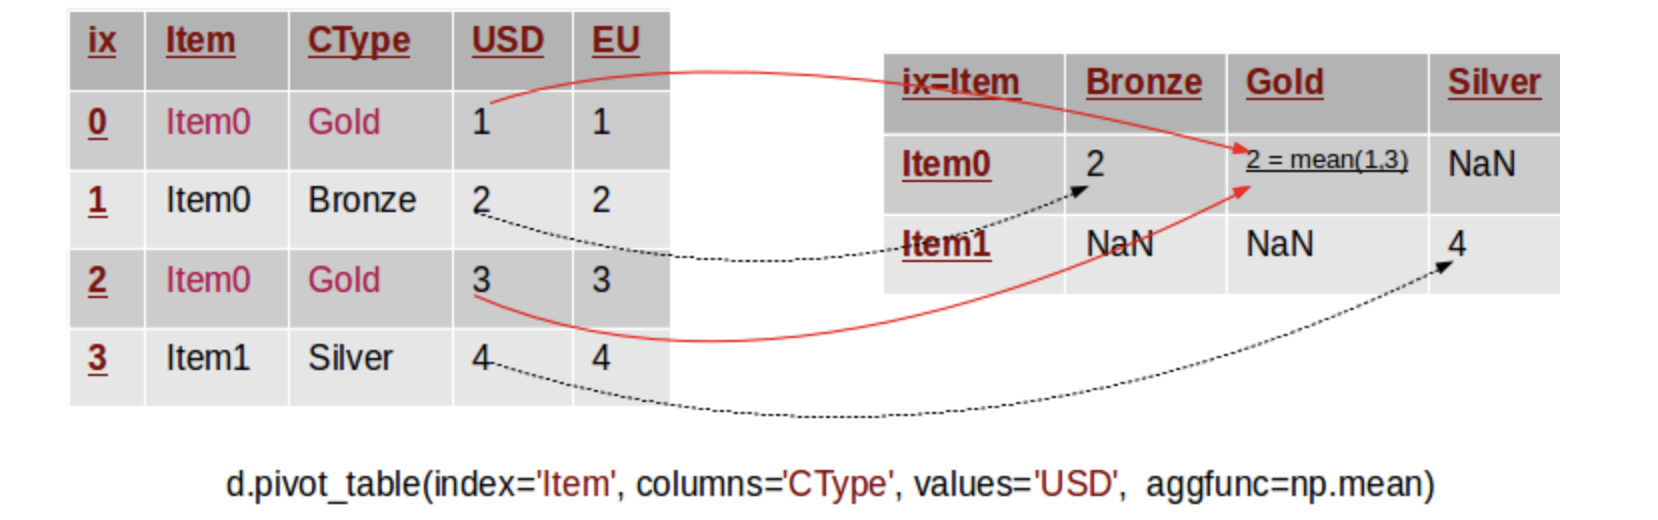

In [47]:
from IPython.display import Image
Image(filename='pivot_table.png') 

In [48]:
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed, it
        is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can c

### 데이터 프레임을 정의 

In [51]:
ddf = pd.DataFrame({ 'A' : ['foo','foo','foo','foo','foo','bar','bar','bar','bar'],
                     'B' : ['one','one','one','two','two', 'one','one','two','two'],
                     'C' : ['small','large','large','small','small','large','small','small','large'],
                     'D' : [1,2,2,3,3,4,5,6,7] })


In [52]:
ddf

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


### 인덱스를 2개 부여하고 칼럼을 하나부여 하고 값을 하나 부여했다. 중복이 발생이 두 수를 합산하는 것으로 정리

In [55]:
table = pd.pivot_table(ddf, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

In [56]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [65]:
table.index

MultiIndex(levels=[['bar', 'foo'], ['one', 'two']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['A', 'B'])

In [66]:
table.columns

Index(['large', 'small'], dtype='object', name='C')

In [72]:
table.values

array([[  4.,   5.],
       [  7.,   6.],
       [  4.,   1.],
       [ nan,   6.]])

## 피봇 테이블로 처리할 때 중복 값의 평균처리

In [43]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))


In [44]:
d = pd.DataFrame(table)

In [45]:
p = d.pivot_table(index='Item', columns='CType', values='USD', aggfunc=np.mean)

In [46]:
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,2.0,NaN
Item1,NaN,NaN,4.0
